In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


gender : Female, Male
age: 0 - 80 years
hypertension: 0, 1 medical condition
heart disease: 0, 1 if a heart disease is present
smoking history: if a person smoked or is smoking
bmi: Body Mass Index
HbA1c_level: Blood Sugar Level in the past months
blood_glucose_level: Amount of glucose in the bloodstream at a given time
diabetes: 0,1 target

In [4]:
data.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [5]:
data.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [6]:
data["gender"] = data["gender"].map(lambda gender: 0 if gender=="Male" else 1)
data.gender.value_counts()

gender
1    58570
0    41430
Name: count, dtype: int64

In [7]:
data.hypertension.value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [8]:
data.heart_disease.value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [9]:
data.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [10]:
data= pd.get_dummies(data, columns=["smoking_history"], dtype="int")
data.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,0,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,1,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,0,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0


array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'smoking_history_No Info'}>,
        <Axes: title={'center': 'smoking_history_current'}>,
        <Axes: title={'center': 'smoking_history_ever'}>,
        <Axes: title={'center': 'smoking_history_former'}>],
       [<Axes: title={'center': 'smoking_history_never'}>,
        <Axes: title={'center': 'smoking_history_not current'}>,
        <Axes: >, <Axes: >]], dtype=object)

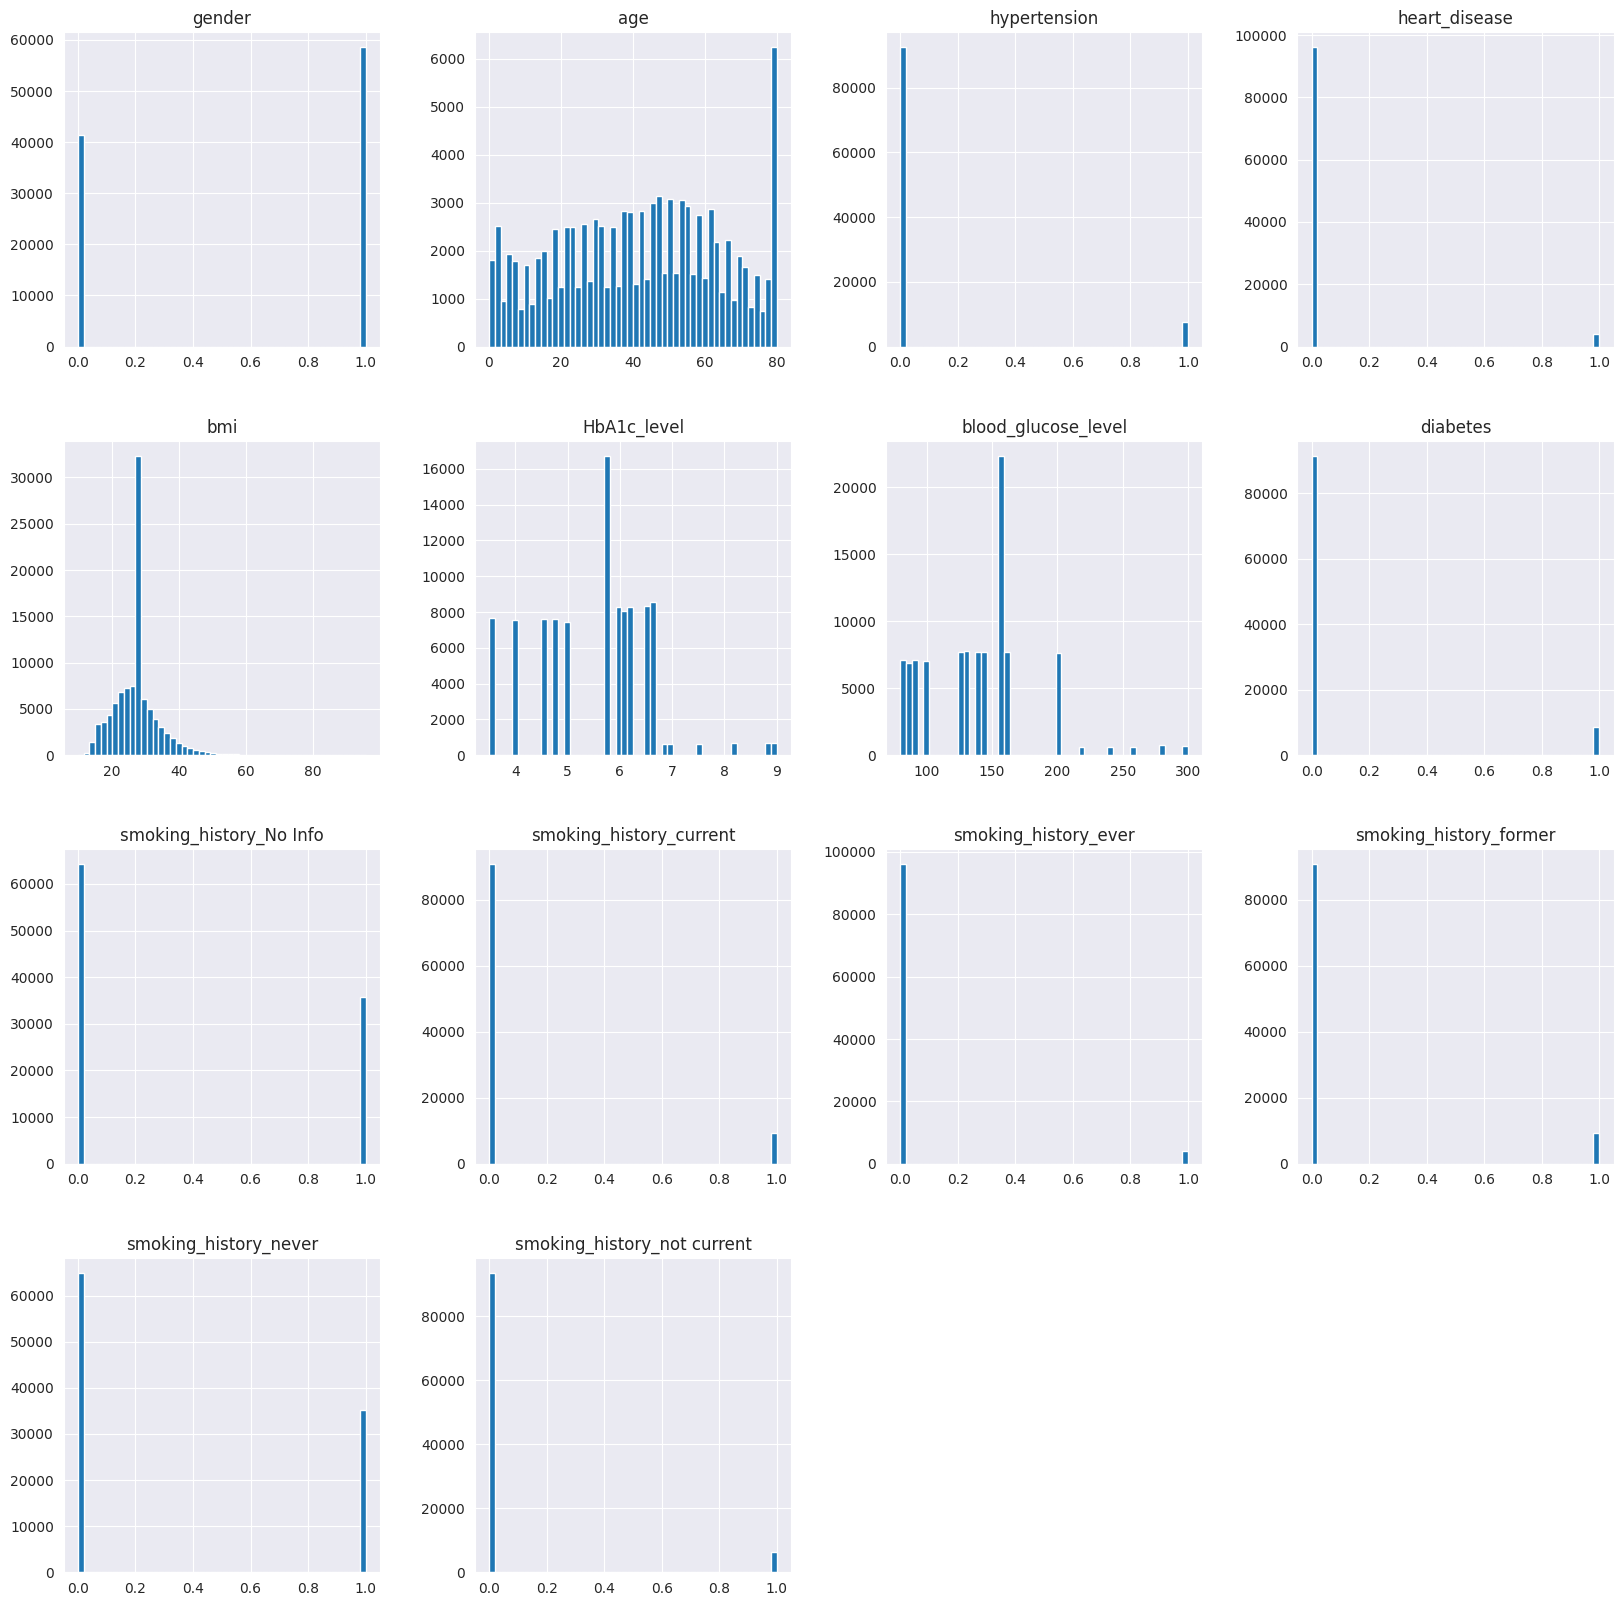

In [11]:
data.hist(figsize=(20,20), bins=50)

In [12]:
data.HbA1c_level.describe()

count    100000.000000
mean          5.527507
std           1.070672
min           3.500000
25%           4.800000
50%           5.800000
75%           6.200000
max           9.000000
Name: HbA1c_level, dtype: float64

In [13]:
data.HbA1c_level.value_counts()

HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64

<Axes: >

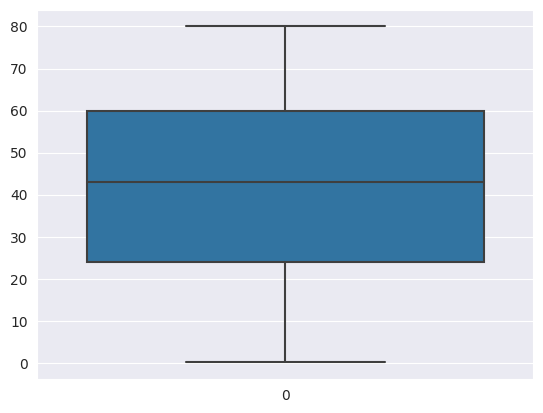

In [14]:
sns.boxplot(data.age)

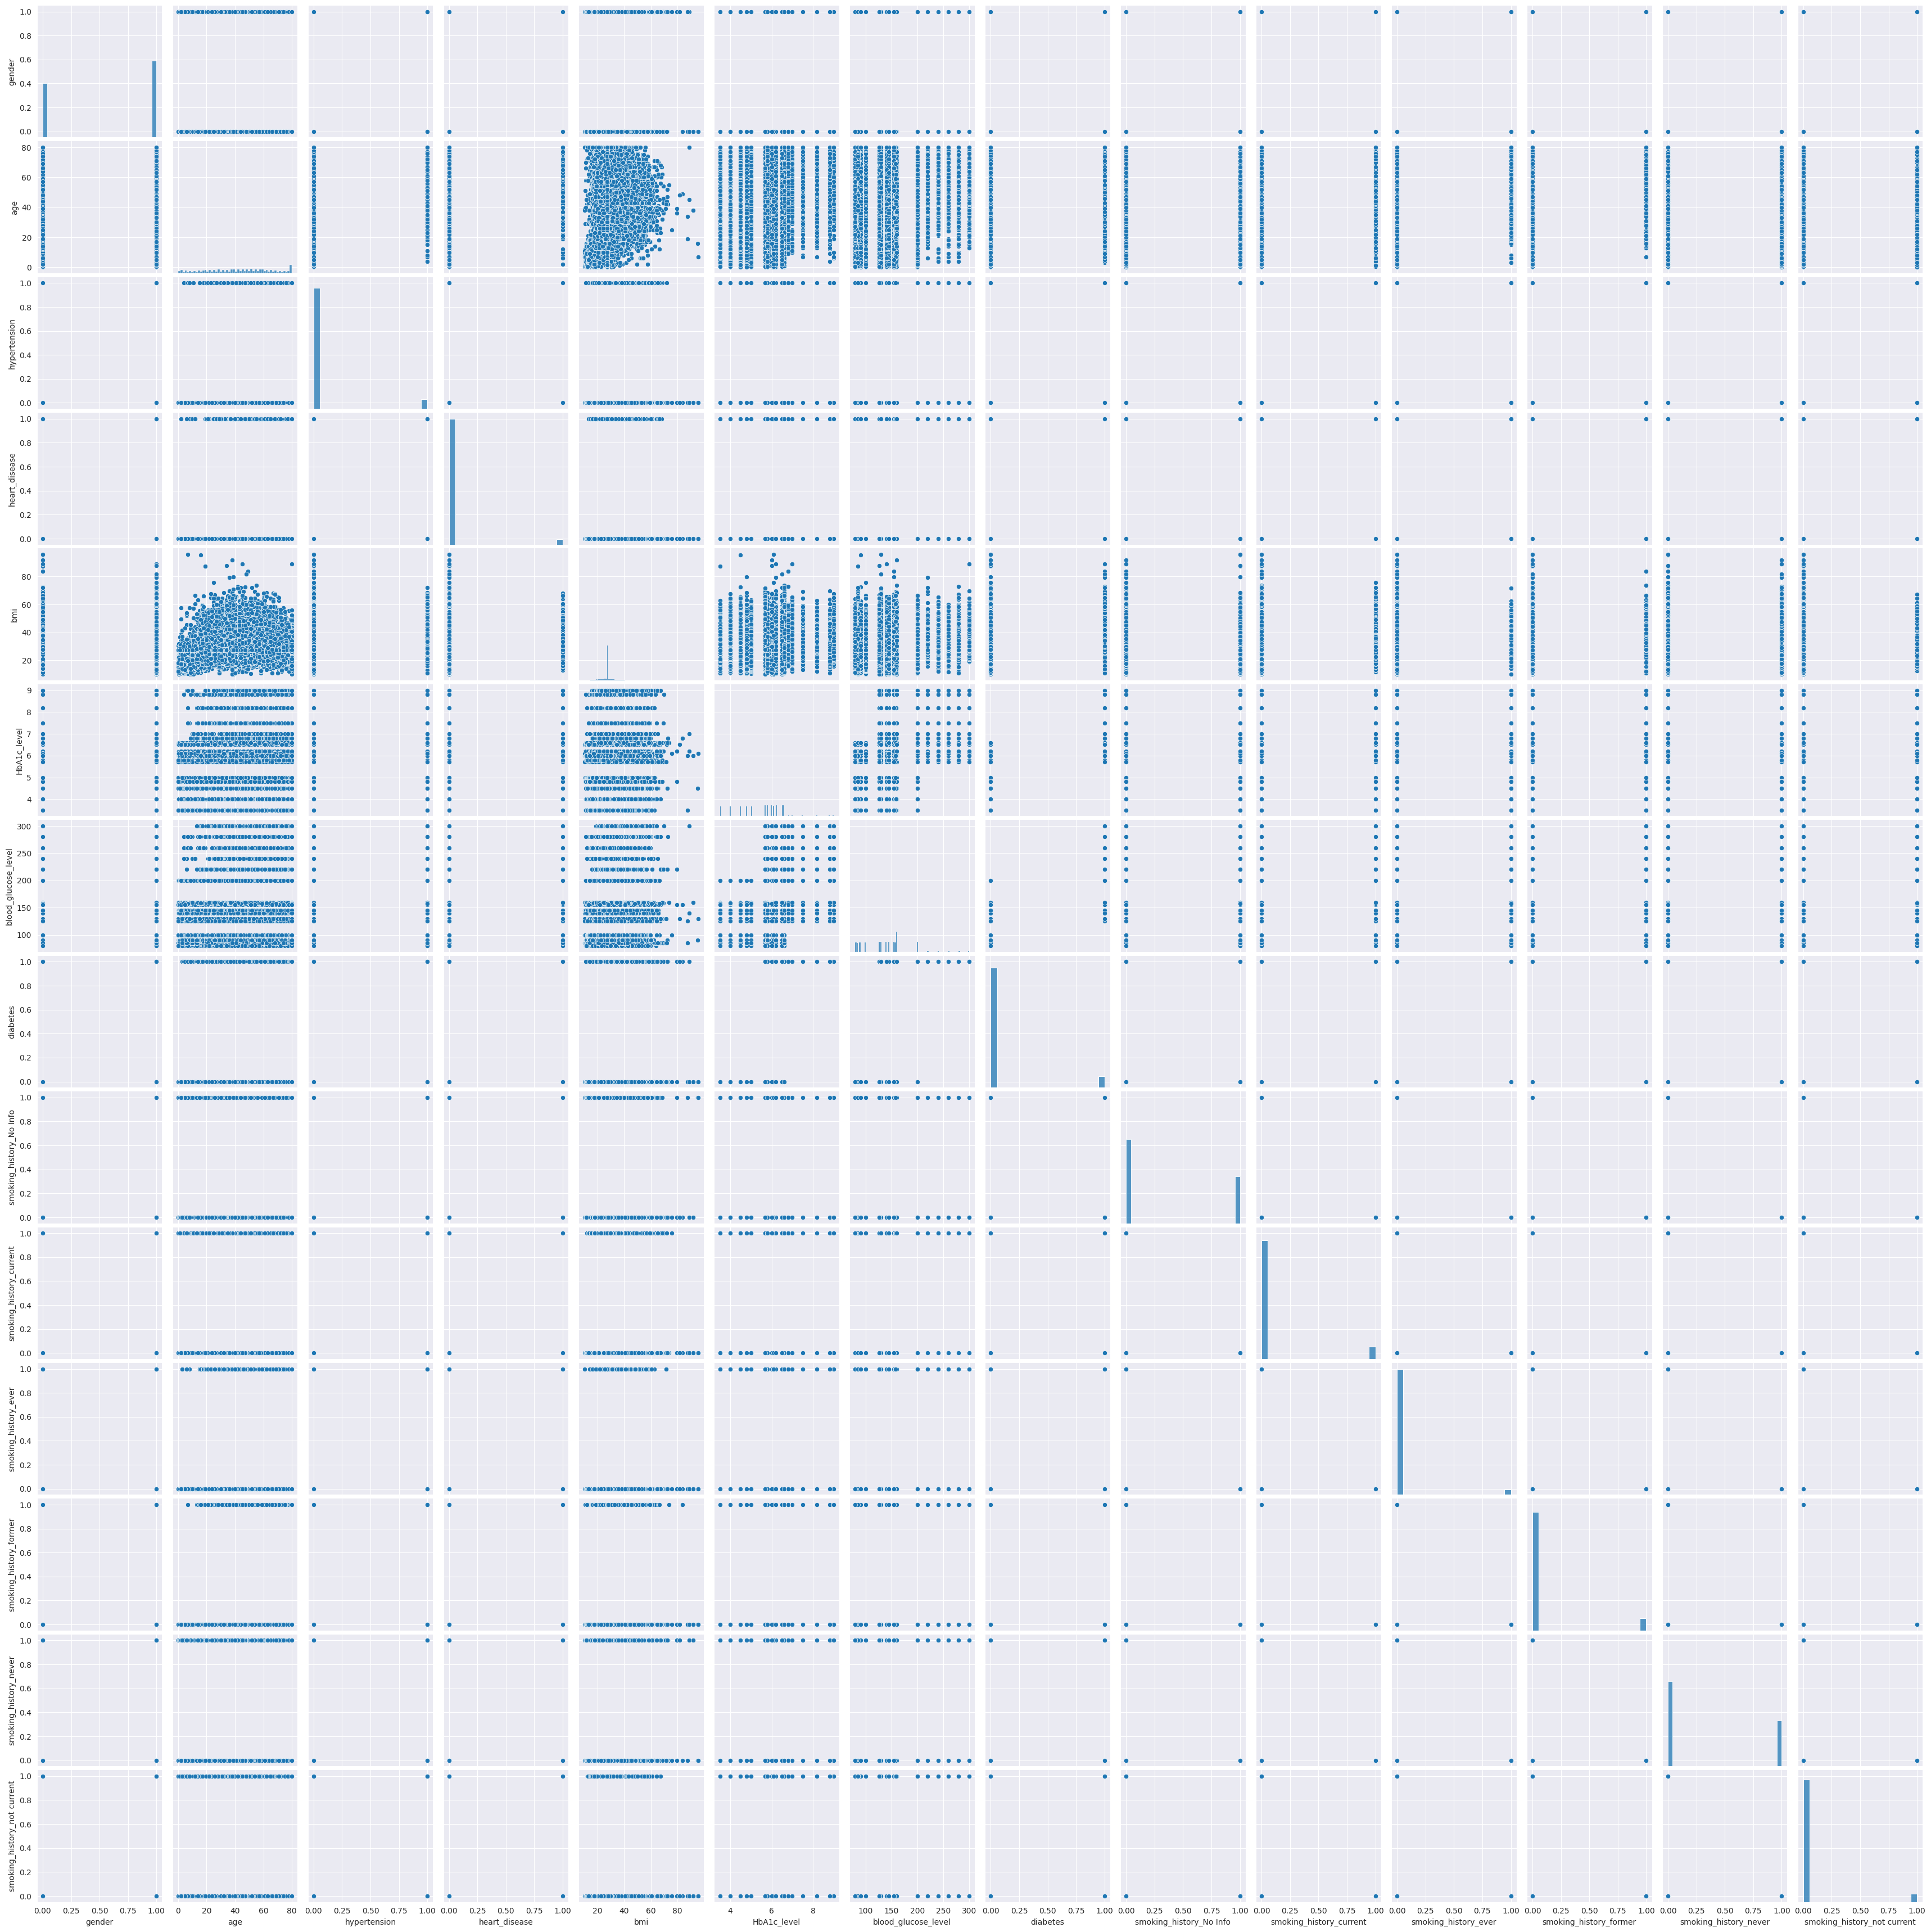

In [15]:
sns.pairplot(data)

<Axes: >

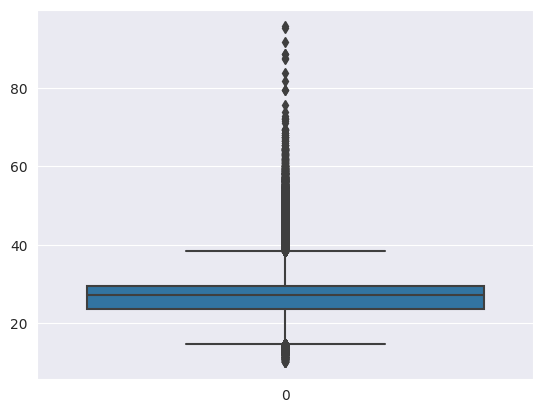

In [16]:
sns.boxplot(data.bmi)

In [17]:
data.bmi.describe()

count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

In [18]:
data.bmi.value_counts()

bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: count, Length: 4247, dtype: int64

<Axes: >

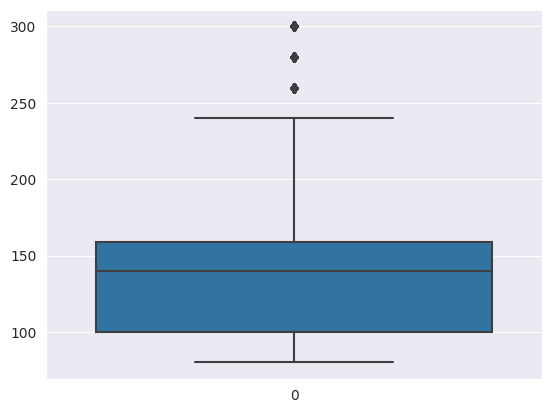

In [19]:
sns.boxplot(data.blood_glucose_level)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgbm
import catboost as ctb

In [21]:
dataimportantlgbmc = data[['heart_disease', 'hypertension', 'gender', 'HbA1c_level', 'blood_glucose_level', 'age', 'bmi']]
x_trainl, x_testl, y_trainl, y_testl = train_test_split(dataimportantlgbmc, data.diabetes, test_size=0.2, random_state=42)

In [22]:
x = data.drop(columns="diabetes")
y = data.diabetes

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X = x_train, y= y_train)
y_pred_tree = dt.predict(x_train)


In [24]:
lg = LogisticRegression(class_weight="balanced")
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)



/home/mischa/PycharmProjects/GooglePlay/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
ctbc = ctb.CatBoostClassifier(random_state = 21, cat_features=["gender"])
ctbc.fit(x_train, y_train)
ctbc_pred = ctbc.predict(x_test)

Learning rate set to 0.06692
0:	learn: 0.5796421	total: 55.3ms	remaining: 55.2s
1:	learn: 0.4800324	total: 60.4ms	remaining: 30.1s
2:	learn: 0.3996305	total: 66.2ms	remaining: 22s
3:	learn: 0.3366827	total: 72.1ms	remaining: 18s
4:	learn: 0.2879363	total: 78.1ms	remaining: 15.5s
5:	learn: 0.2415600	total: 84.3ms	remaining: 14s
6:	learn: 0.2079906	total: 90.5ms	remaining: 12.8s
7:	learn: 0.1850706	total: 96.8ms	remaining: 12s
8:	learn: 0.1674214	total: 103ms	remaining: 11.4s
9:	learn: 0.1479063	total: 110ms	remaining: 10.9s
10:	learn: 0.1391733	total: 116ms	remaining: 10.5s
11:	learn: 0.1259698	total: 123ms	remaining: 10.1s
12:	learn: 0.1176712	total: 129ms	remaining: 9.79s
13:	learn: 0.1138202	total: 136ms	remaining: 9.56s
14:	learn: 0.1106308	total: 143ms	remaining: 9.38s
15:	learn: 0.1045258	total: 150ms	remaining: 9.22s
16:	learn: 0.0997350	total: 156ms	remaining: 9.04s
17:	learn: 0.0972771	total: 163ms	remaining: 8.89s
18:	learn: 0.0945795	total: 169ms	remaining: 8.75s
19:	learn: 0

In [26]:
lgbmgbc = lgbm.LGBMClassifier(random_state=21)
lgbmgbc.fit(x_train, y_train)
lgbmgbc_pred = lgbmgbc.predict(x_test)

In [27]:

lgbmgbc.fit(x_trainl, y_trainl)
lgbmgbc_predl = lgbmgbc.predict(x_testl)

In [28]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_test)


In [29]:
gs = GridSearchCV(dt, {"criterion":["gini", "entropy"], "max_depth":[i for i in range(5, 25)], "min_samples_leaf":[i for i in range(10,20)]}, cv=5)
gs.fit(x_train, y_train)
y_pred_gs = gs.predict(x_test)

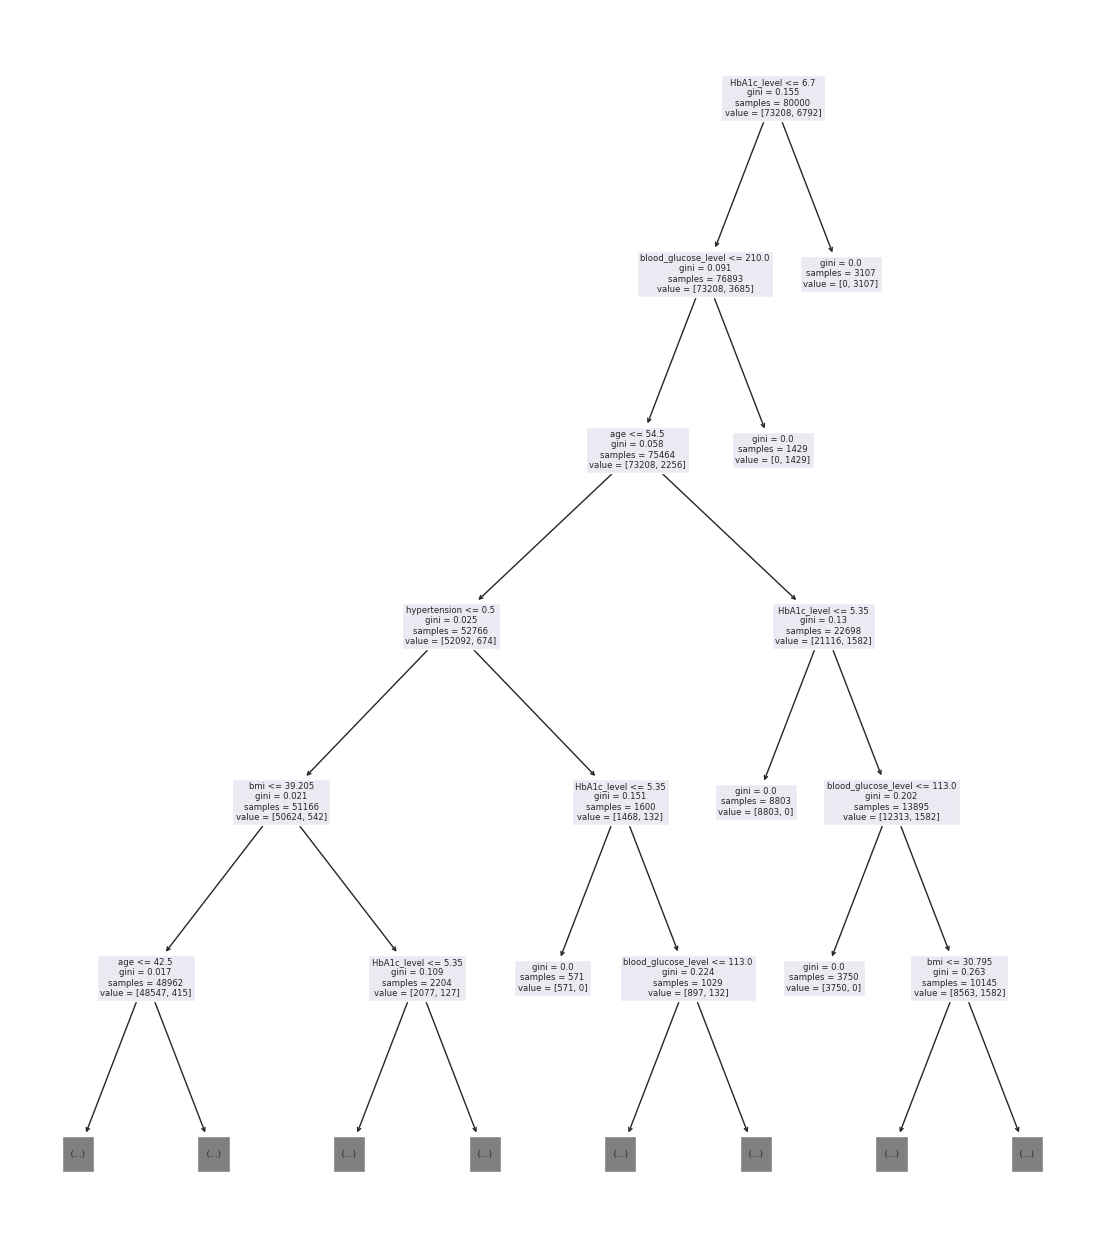

In [30]:
plt.figure(figsize=(14, 16))
treeplot = tree.plot_tree(dt, max_depth=5, feature_names=data.columns)

In [31]:
y_pred_test_tree = dt.predict(x_test)

In [32]:
bc = BaggingClassifier()
bc.fit(x_train, y_train)
pred_bc = bc.predict(x_test)

In [33]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
DBSCAN.fit(x_train, y_train)
preddb = DBSCAN.fit_predict(x_test)
print(classification_report(y_test, preddb))

AttributeError: 'DataFrame' object has no attribute '_validate_params'

dtgs = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=10)
dtgs.fit(x_train, y_train)
dtgs_pred = dtgs.predict(y_test)

In [ ]:
gs.best_params_

In [ ]:
print(classification_report(y_test, y_pred_gs))

In [ ]:
print(classification_report(y_test, pred_bc))

In [ ]:
print(classification_report(y_test, ctbc_pred))

In [ ]:
print(classification_report(y_test, gbc_pred))

In [ ]:
print(classification_report(y_test, lgbmgbc_pred))

In [ ]:
print(classification_report(y_testl, lgbmgbc_predl))


In [ ]:
print(classification_report(y_train, y_pred_tree))

In [ ]:
print(classification_report(y_test, y_pred_test_tree))

In [ ]:
dt.feature_importances_

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
sortedindex = dt.feature_importances_.argsort()
plt.barh(data.columns[sortedindex], dt.feature_importances_[sortedindex])
plt.show()

In [ ]:
sortedindex = ctbc.feature_importances_.argsort()
plt.barh(data.columns[sortedindex], ctbc.feature_importances_[sortedindex])
plt.show()

In [ ]:
sortedindex = lgbmgbc.feature_importances_.argsort()
plt.barh(data.columns[sortedindex], lgbmgbc.feature_importances_[sortedindex])
plt.show()

In [ ]:
data.columns[sortedindex]